# Importing librabries

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# loading the dataset

In [3]:
df=pd.read_csv('hotel_bookings 2.csv')

# Exploratory Data Analysis And Data Cleaning

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [5]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [6]:
df.shape

(119390, 32)

In [7]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'],format='%d/%m/%Y')

In [10]:
df.describe(include ='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [11]:
for col in df.describe(include ='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)
    

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [12]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [13]:
df.drop(['agent','company'],axis=1,inplace = True)
df.dropna(inplace =True)

In [14]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [15]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


In [16]:
df= df[df['adr']<5400]

In [17]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688,2016-07-30 07:39:51.289939968
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680,NaN


# Data Analysis And Visualisations

In [18]:
cancelled_percentage= df['is_canceled'].value_counts(normalize=True) * 100
cancelled_percentage

is_canceled
0    62.865337
1    37.134663
Name: proportion, dtype: float64

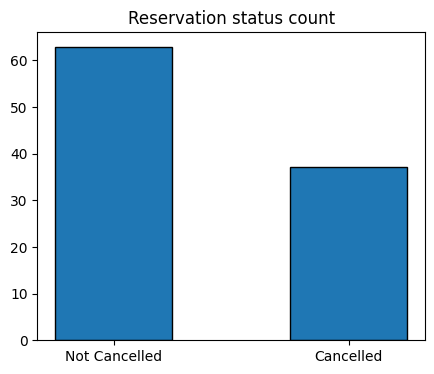

In [19]:
plt.figure(figsize=(5,4))
plt.title('Reservation status count')
plt.bar(['Not Cancelled','Cancelled'],cancelled_percentage,edgecolor='k',width=0.5)
plt.show()

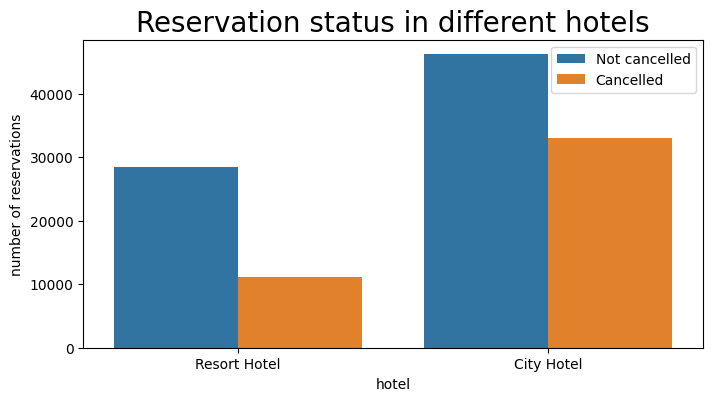

In [20]:
plt.figure(figsize=(8,4))
ax1=sns.countplot(x='hotel',hue='is_canceled',data=df)
legend_labels=ax1.get_legend_handles_labels()

plt.title('Reservation status in different hotels',size=20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.legend(['Not cancelled','Cancelled'])
plt.show()

In [21]:
Resort_Hotel= df[df['hotel']=='Resort Hotel']
Resort_Hotel['is_canceled'].value_counts(normalize=True) * 100

is_canceled
0    72.024952
1    27.975048
Name: proportion, dtype: float64

In [22]:
City_Hotel= df[df['hotel']=='City Hotel']
City_Hotel['is_canceled'].value_counts(normalize=True) * 100

is_canceled
0    58.291825
1    41.708175
Name: proportion, dtype: float64

In [23]:
Resort_Hotel_count=Resort_Hotel.groupby('reservation_status_date')[['adr']].mean()
City_Hotel_count=City_Hotel.groupby('reservation_status_date')[['adr']].mean()

[]

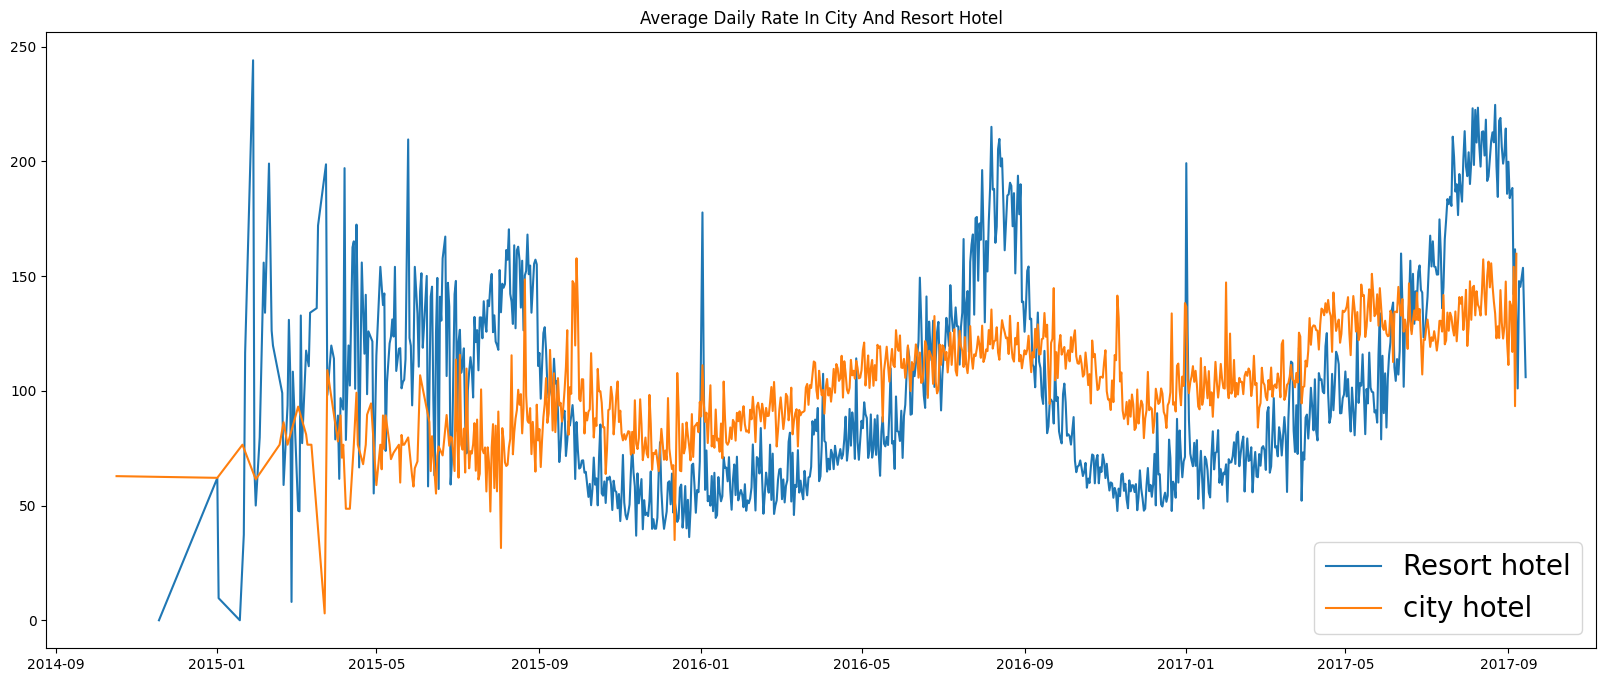

In [24]:
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate In City And Resort Hotel')       
plt.plot(Resort_Hotel_count.index,Resort_Hotel_count['adr'],label='Resort hotel')
plt.plot(City_Hotel_count.index,City_Hotel_count['adr'],label='city hotel')
plt.legend(fontsize=20)
plt.plot()
           

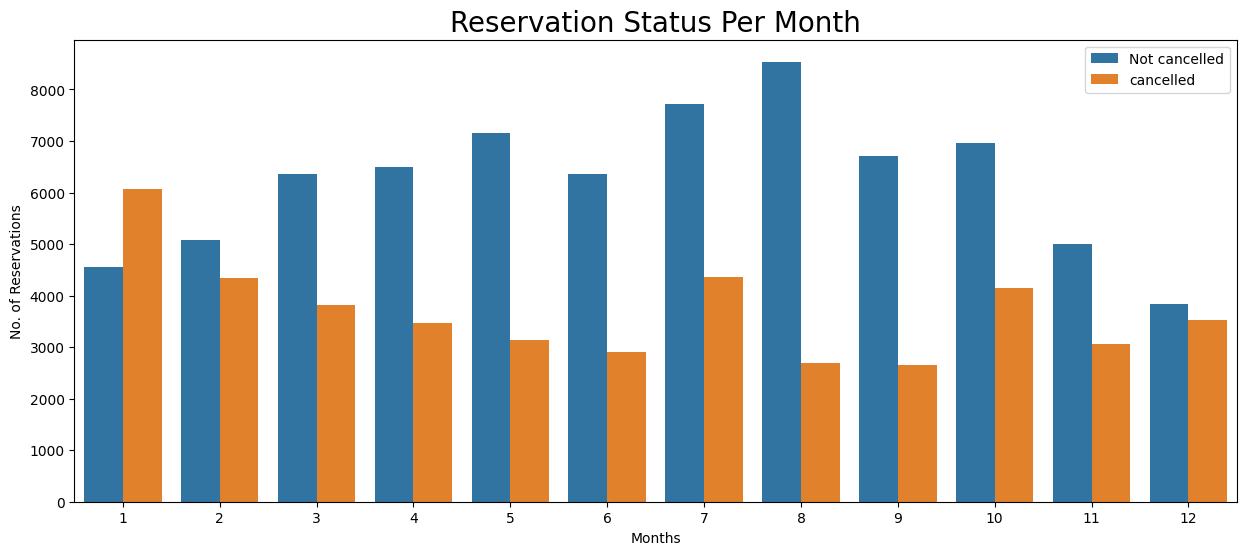

In [25]:
df['months']=df['reservation_status_date'].dt.month
plt.figure(figsize=(15,6))
ax1=sns.countplot(x='months',hue='is_canceled',data=df)
plt.title('Reservation Status Per Month',size=20)
plt.xlabel('Months')
plt.ylabel('No. of Reservations')
plt.legend(['Not cancelled','cancelled'])
plt.show()


In [40]:
cancelled_months=df[df['is_canceled']==1].groupby('months')[['adr']].sum().reset_index()
cancelled_months

,months,adr
0,1,571203.57
1,2,447675.76
2,3,424872.56
3,4,425315.23
4,5,391438.08
5,6,359003.34
6,7,481376.17
7,8,325668.43
8,9,274176.33
9,10,330968.87


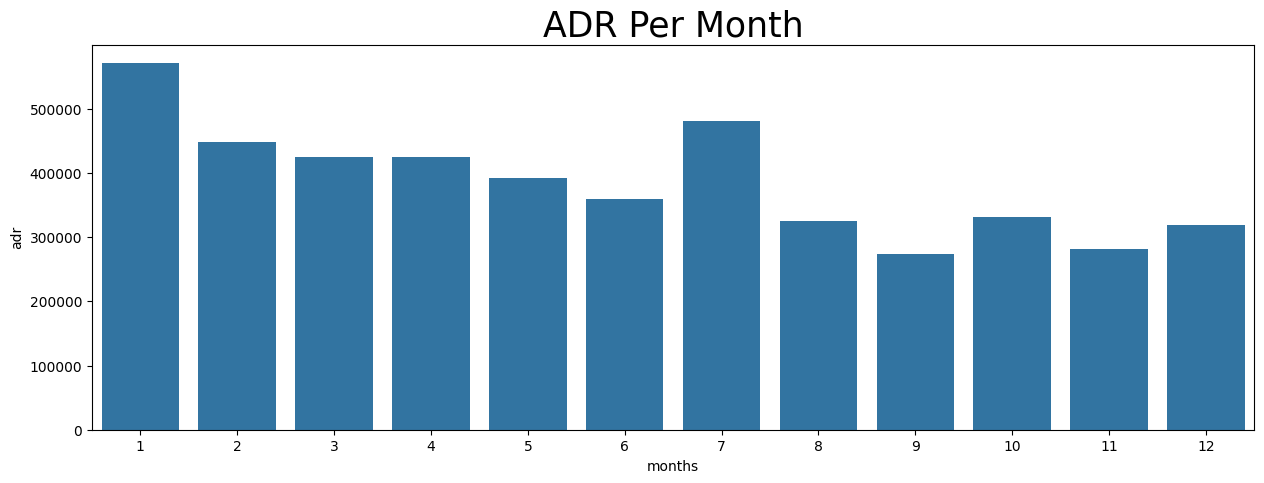

In [47]:

plt.figure(figsize=(15,5))
plt.title('ADR Per Month',fontsize=25)
sns.barplot(x='months',y='adr',data=cancelled_months)
plt.show()

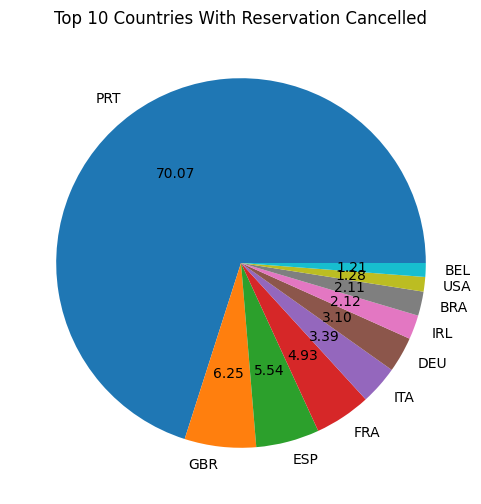

In [27]:
cancelled_booking=df[df['is_canceled']==1]
top_10_country=cancelled_booking['country'].value_counts()[:10]
plt.figure(figsize=(6,6))
plt.title('Top 10 Countries With Reservation Cancelled')
plt.pie(top_10_country,autopct='%.2f',labels=top_10_country.index)
plt.show()

In [28]:
df['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [29]:
df['market_segment'].value_counts(normalize=True)*100

market_segment
Online TA        47.437698
Offline TA/TO    20.319268
Groups           16.658116
Direct           10.469566
Corporate         4.298679
Complementary     0.617341
Aviation          0.199332
Name: proportion, dtype: float64

In [30]:
cancelled_booking['market_segment'].value_counts()

market_segment
Online TA        20738
Groups           12097
Offline TA/TO     8277
Direct            1920
Corporate          978
Complementary       90
Aviation            52
Name: count, dtype: int64

In [31]:
cancelled_booking['market_segment'].value_counts(normalize=True)*100

market_segment
Online TA        46.969560
Groups           27.398532
Offline TA/TO    18.746603
Direct            4.348614
Corporate         2.215075
Complementary     0.203841
Aviation          0.117775
Name: proportion, dtype: float64

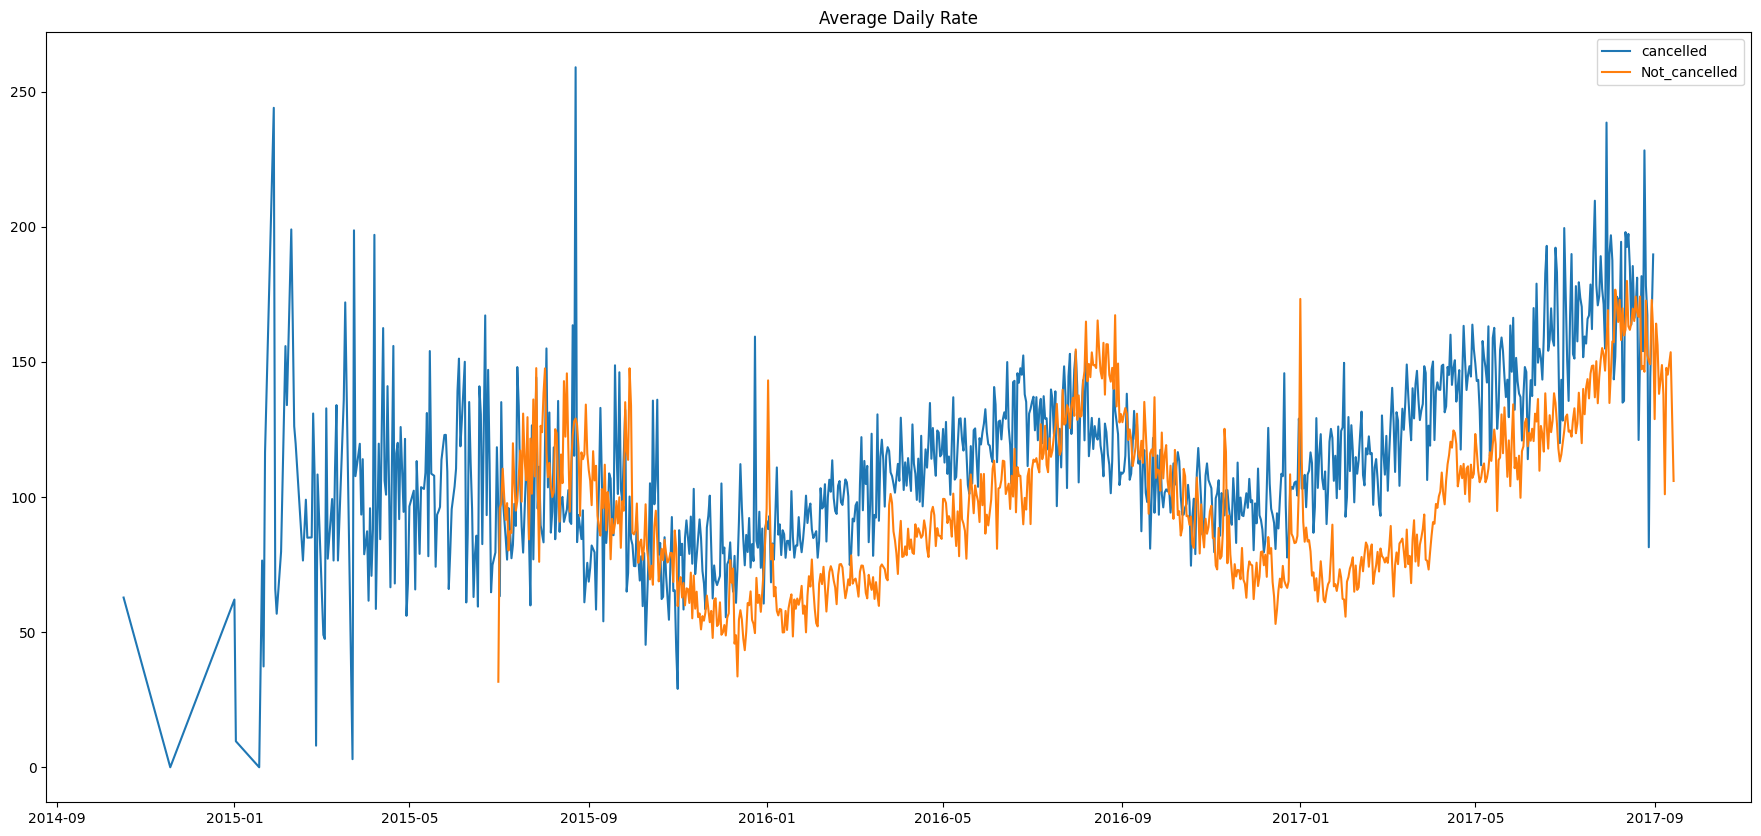

In [32]:
cancelled_df_adr=cancelled_booking.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date',inplace=True)

Not_cancelled_booking=df[df['is_canceled']==0]

Not_cancelled_df_adr=Not_cancelled_booking.groupby('reservation_status_date')[['adr']].mean()
Not_cancelled_df_adr.reset_index(inplace=True)
Not_cancelled_df_adr.sort_values('reservation_status_date',inplace=True)

plt.figure(figsize=(22,10))
plt.title('Average Daily Rate')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'],label='cancelled')
plt.plot(Not_cancelled_df_adr['reservation_status_date'],Not_cancelled_df_adr['adr'],label='Not_cancelled')
plt.legend()
plt.show()

In [33]:
Not_cancelled_df_adr_2016_17=Not_cancelled_df_adr[(Not_cancelled_df_adr['reservation_status_date']>'2016')& (Not_cancelled_df_adr['reservation_status_date']>'2016')]
cancelled_df_adr_2016_17=cancelled_df_adr[(cancelled_df_adr['reservation_status_date']>'2016')& (cancelled_df_adr['reservation_status_date']>'2016')]

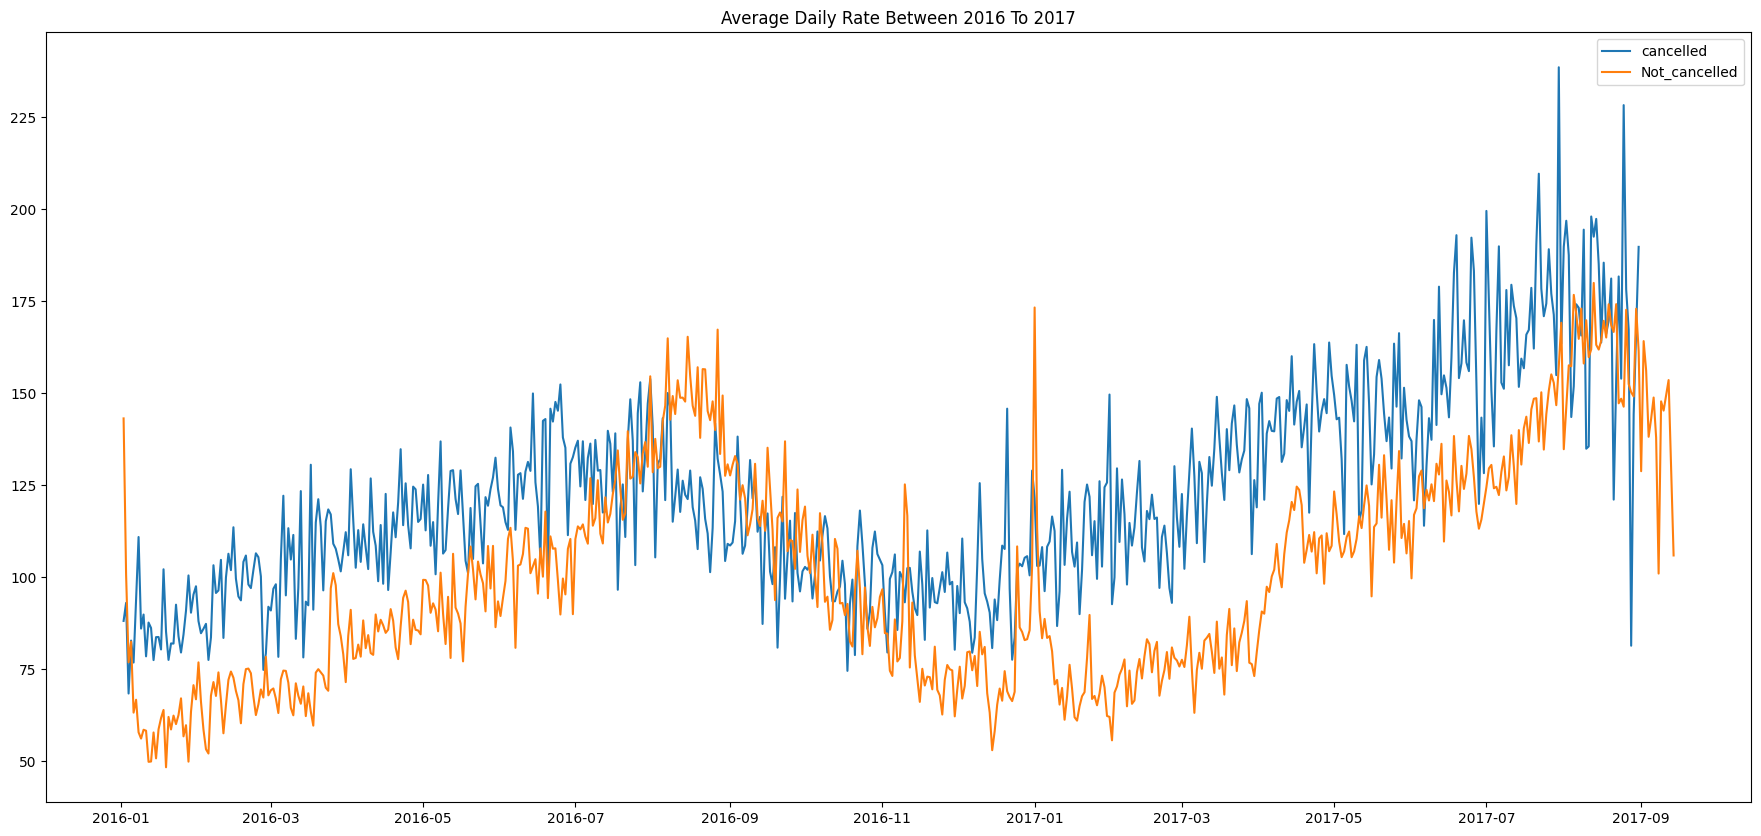

In [34]:
plt.figure(figsize=(22,10))
plt.title('Average Daily Rate Between 2016 To 2017')
plt.plot(cancelled_df_adr_2016_17['reservation_status_date'],cancelled_df_adr_2016_17['adr'],label='cancelled')
plt.plot(Not_cancelled_df_adr_2016_17['reservation_status_date'],Not_cancelled_df_adr_2016_17['adr'],label='Not_cancelled')
plt.legend()
plt.show()